<h1 align="center">Nanoestructura semiconductora 2D a temperatura absoluta T</h1>
<div align="right">David A. Miranda, PhD<br>Creado en 2021<br>Actualizado el 11 de febrero de 2023</div>

<h2>1. Importar librerías</h2>

In [1]:
import numpy as np
import pandas as pd
import scipy.constants as cte
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## 2. Planteamiento del problema

Sea una película delgada (con ancho menor a 100 nm) semiconductora, en la cual se encuentran electrones con masa efectiva $m^*$ y con una probabilidad despreciable de encontrarse fuera de la película.  Si se asume una región de confinamiento en forma de paralepípedo regular, como una caja con lados $L_x$, $L_y$ y $L_z$, en la cual se tiene energía potencial eléctrica igual a cero dentro de la caja e infinita en los bordes y fuera de la misma, calcular el valor esperado para la energía a una temperatura absoluta $T$.

Como se supone que el electrón está en una película delgada de ancho menor a 100nm (nanoestructura 2D), se puede asumir que la función de onda que describe su estado depende solo de las coordinadas que describen dicha película $(x,y)$.  Entonces, la función de onda $\Psi _{n_{x}n_{y}}(x,y)$ para un electrón en una 
caja de potencial de lados $L_{x}$ y $L_{y}$ está dada por,

$$\Psi _{n_{x}n_{y}}(x,y)=\varphi _{n_{x}}(x)\vartheta _{n_{y}}(y)\qquad    (1)$$

Donde,

$$\varphi _{n_{x}}(x)=\sqrt{\frac{2}{L_{x}}}sen\left(\frac{n_{x}\pi}{L_{x}}x\right)\qquad(2)$$

$$\vartheta _{n_{y}}(y)=\sqrt{\frac{2}{L_{y}}}sen\left(\frac{n_{y}\pi}{L_{y}}y\right)\qquad (3)$$

La energía para un cierto estado $r$ está determinada por los dos números cuánticos $n_{x}$ y $n_{y}$,

$$E_r = E_{n_{x}n_{y}}=\frac{\pi^{2}\hbar^{2}}{2m^*} \left( \frac{n_{x}^{2}}{L_{x}^{2}}+\frac{n_{y}^{2}}{L_{y}^{2}} \right)\qquad (4)$$

El valor esperado para la energía $\bar{E}$, a una cierta temperatura absoluta $T$, se puede calcular como $\bar{E} = -\frac{\partial ln(Z)}{\partial \beta}$, donde $Z = \sum_r e^{-\beta Er}$ es la función de partición, $\beta = (k_B T)^{-1}$ y $k_B$, es la constante de Boltzmann.

$$Z = \sum_{n_x, n_y} e^{-\beta E_{n_{x}n_{y}}}$$

$$\bar{E} = \frac{1}{Z} \sum_{n_x, n_y} E_{n_{x}n_{y}} e^{-\beta E_{n_{x}n_{y}}} \qquad (5)$$

Ver [explicación](https://youtu.be/8-38GaFD8C8).

## 3. Definiciones y Métodos

In [2]:
Lx = 100 # nm
Ly = 100 # nm
Lz = 10  # nm
N = 50 # número de puntos
m = 0.8 * cte.m_e  # Masa efectiva del electrón

In [3]:
def phy_x(x, n_x):
    phy = np.sqrt(2.0/Lx)*np.sin(n_x*np.pi*x/Lx)
    phy[(x > Lx) | (x < 0)] = 0.0
    return phy

In [4]:
def theta_y(y, n_y):
    theta = np.sqrt(2.0/Ly)*np.sin(n_y*np.pi*y/Ly)
    theta[(y > Ly) | (y < 0)] = 0.0
    return theta

In [5]:
def Er(n_x, n_y, Lx=Lx, Ly=Ly, m=m): 
    return (np.pi*cte.hbar)**2 * ((n_x/(Lx*1e-9))**2 + (n_y/(Ly*1e-9))**2) / (2.0*m)

In [6]:
def mean_energy(T, num_states=30):
    beta = 1 / (cte.Boltzmann * T)
    nxs = np.arange(0, num_states)
    zrEr = 0
    zr = 0
    Z = 0
    for nx in nxs:
        for ny in nxs:
            zr = np.exp(-beta*Er(nx, ny))
            zrEr += zr * Er(nx, ny)
            Z += zr
    return zrEr / Z

## 4. Cálculos y Figuras
### 4.1. Función de onda

In [7]:
delta_x = Lx/10.0
delta_y = Ly/10.0
x = np.linspace(-delta_x, Lx + delta_x, N)
y = np.linspace(-delta_x, Ly + delta_y, N)

xx, yy = np.meshgrid(x, y, sparse=True)
Psi_xy = lambda x, y, n_x, n_y: phy_x(x, n_x)*theta_y(y, n_y)

Er(1,2) = 3.77e-23 [J] = 0.235 [meV]


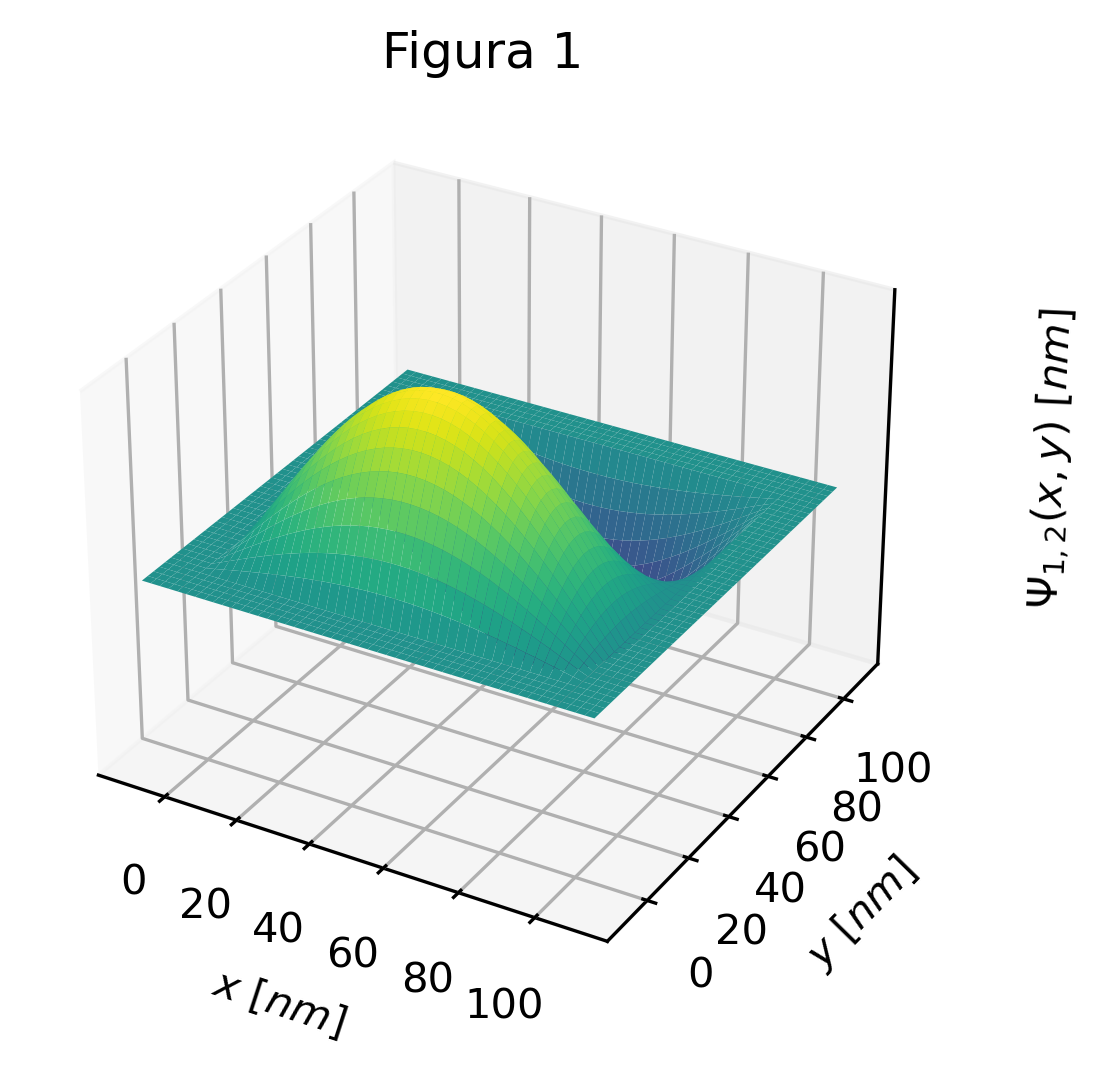

In [8]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection='3d')

nx = 1
ny = 2
ax.plot_surface(xx, yy, Psi_xy(xx, yy, nx, ny), cmap='viridis', edgecolor='none')
ax.axes.set_xlabel(r'$x$ $[nm]$')
ax.axes.set_ylabel(r'$y$ $[nm]$')
ax.axes.set_zlabel(r'$\Psi_{%d,%d}(x,y)$ $[nm]$' % (nx, ny))
ax.axes.set_zticks([])
plt.title('Figura 1')
print('Er(%d,%d) = %0.3g [J] = %0.3g [meV]' % (nx, ny, Er(nx,ny), 1e3*Er(nx,ny)/cte.e))

### 4.2. Energía para el sistema aislado $(T = 0 K)$

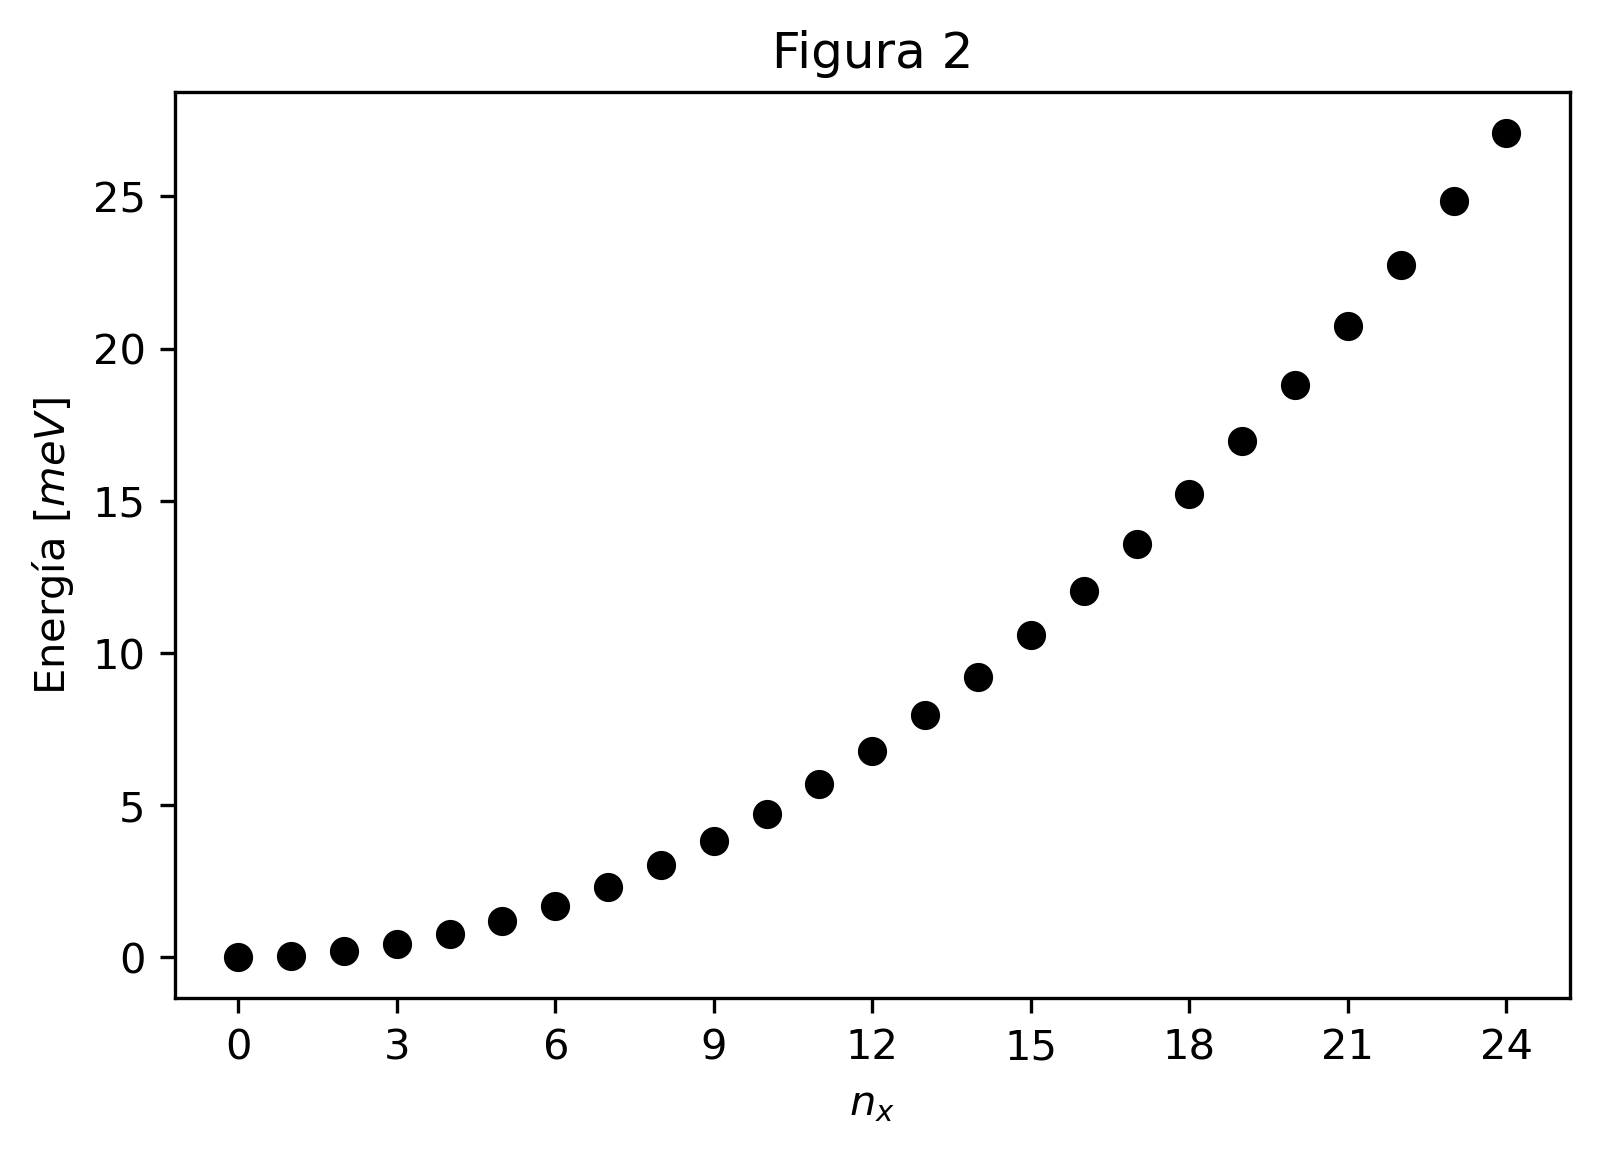

In [9]:
nx = np.arange(0, 25)
plt.figure(dpi=300)
plt.plot(nx, 1000 * Er(nx, 0)/cte.e, 'ok')
plt.xlabel(r'$n_x$')
plt.ylabel(r'Energía $[m eV]$')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
_ = plt.title('Figura 2')

### 4.3. Valor esperado de la energía $\bar{E}$ a una temperatura absoluta $T$

In [10]:
T = np.linspace(1e-3, 300, 100)
E_mean = np.array([mean_energy(this_T) for this_T in T])

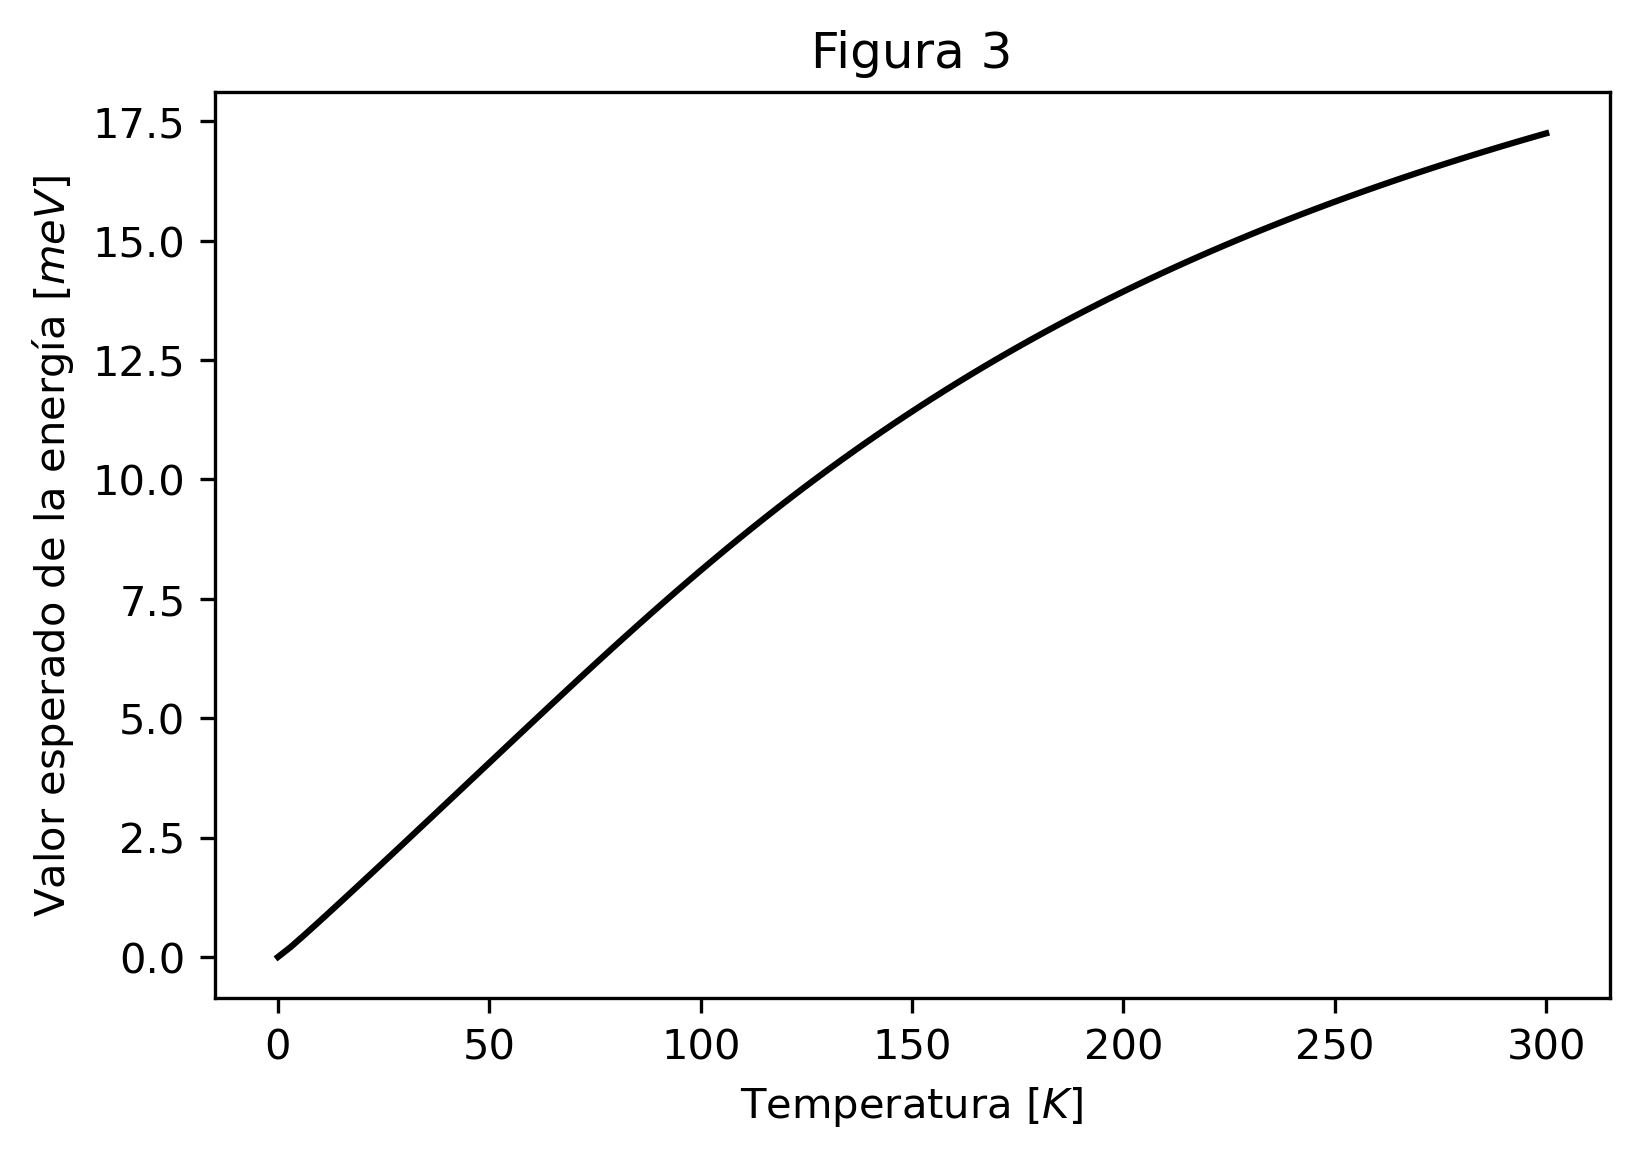

In [11]:
plt.figure(dpi=300)
plt.plot(T, 1000*E_mean/cte.e, 'k')
plt.xlabel(r'Temperatura $[K]$')
plt.ylabel(r'Valor esperado de la energía $[meV]$')
_ = plt.title('Figura 3')

### 4.4. Contribución al valor esperado de la energía

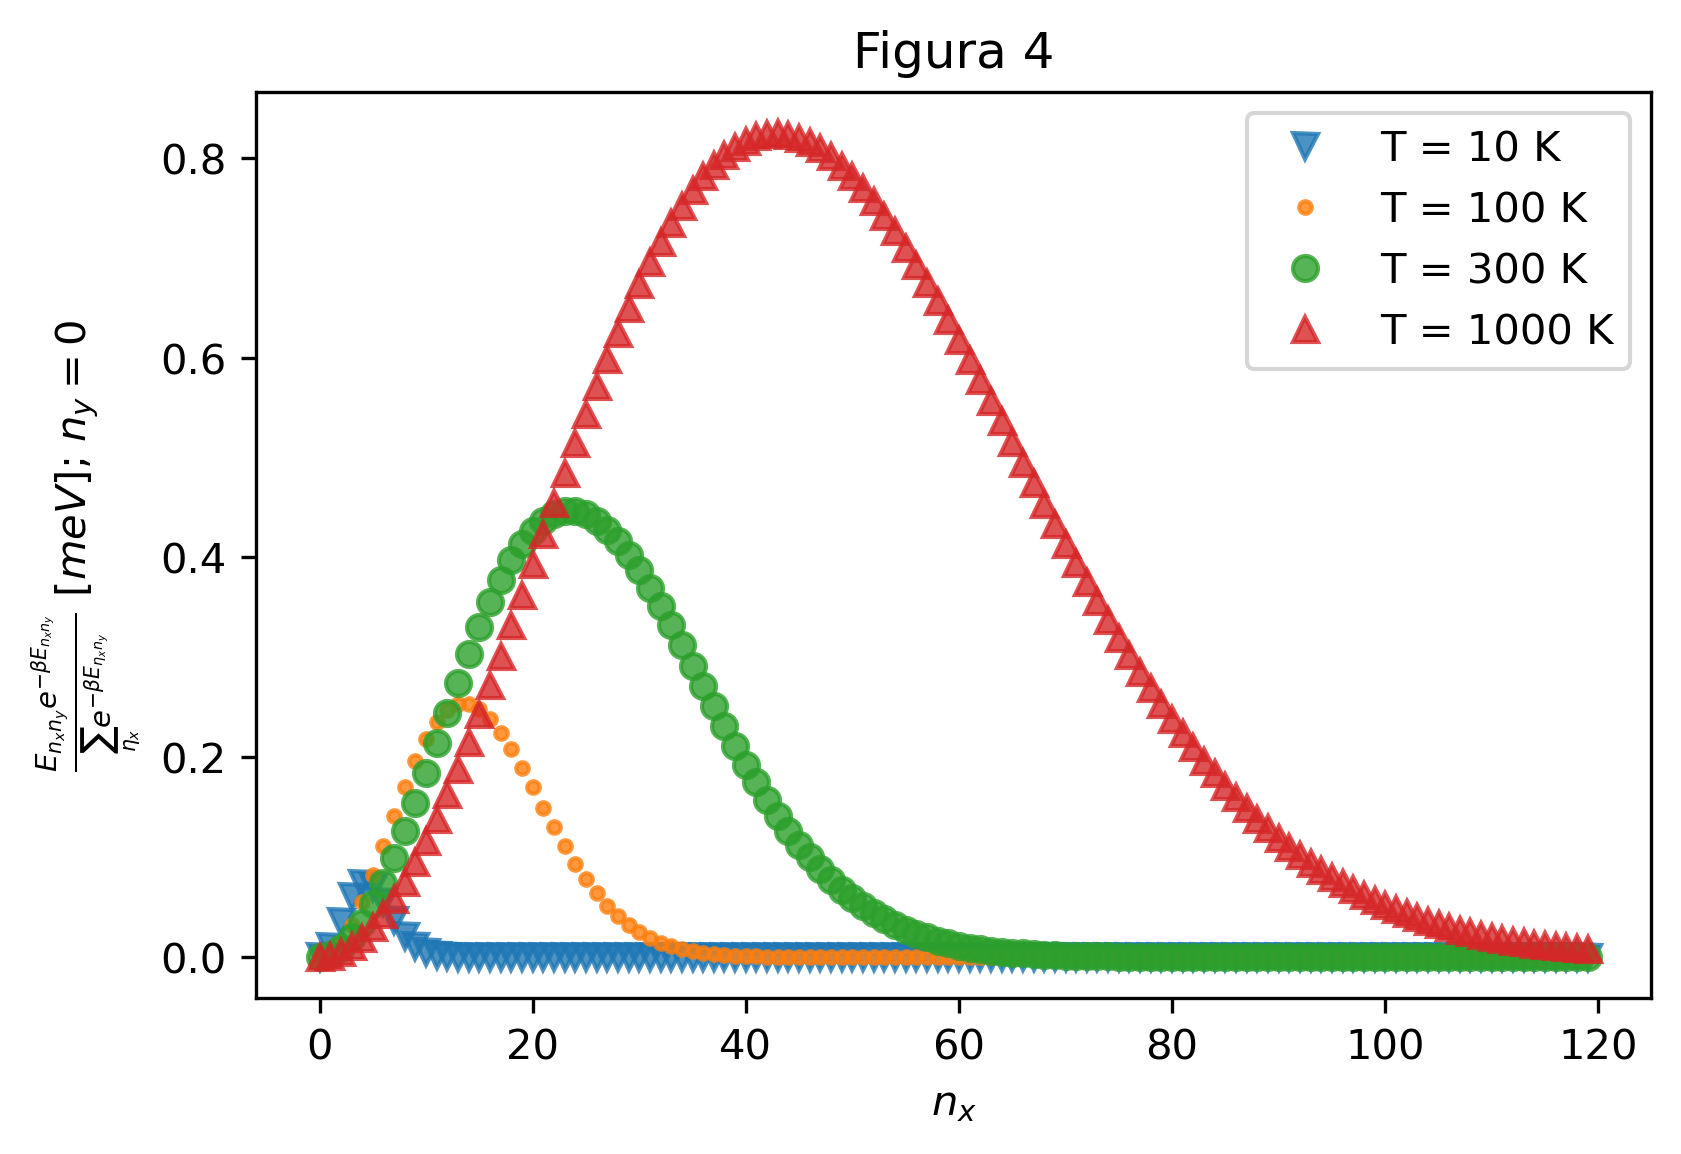

In [12]:
n_x = np.arange(0,120,1)
n_y = 0
plt.figure(dpi=300)
markers = ['v', '.', 'o', '^']
for i, T in enumerate([10, 100, 300, 1000]):
    En = Er(n_x, n_y, Lx=Lx, Ly=Ly, m=m)
    beta = 1 / (cte.Boltzmann * T)
    Ekzk = En*np.exp(-beta*En)
    Z = sum(np.exp(-beta*En))
    plt.plot(
        n_x, 
        (1000/cte.e) * Ekzk/Z, markers[i], 
        label='T = %0.0f K' % T,
        alpha=0.8)
plt.ylabel(r'$\frac{ E_{n_{x}n_{y}} e^{ -\beta E_{n_{x}n_{y}} } }{\sum_{\eta_x} e^{-\beta E_{\eta_{x}n_{y}}}}$ $[meV]$; $n_y = %0.0f$' % n_y)
plt.xlabel(r'$n_x$')
plt.title('Figura 4')
_ = plt.legend()

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas 

5.1.1. Con sus propias palabras, describa en qué consiste el problema resuelto en este *Worked Example*.

5.1.2. Describa cómo se calcula la función de onda y energía para el sistema mecánico cuántico.

5.1.3. ¿Cómo se define y cuál es el significado físico de la masa efectiva?

5.1.4. ¿Cuál es el propósito de utilizar en la ecuación (4) la masa $m^*$ efectiva en vez de la masa del electrón?

5.1.5. Interprete la ecuación (5). Tenga en cuenta los resultados mostrados en la Figura 4.

### 5.2. Segundo bloque de preguntas

5.2.1. Describa como los métodos del ítem 3 implementan los cálculos requeridos para resolver el problema planteado.

5.2.2. En el método *mean_energy*, ¿cuál es el propósito de definir *zr* y *Z*? ¿Se podría hacer el cálculo con solo una de las dos variables?  Explique sus respuestas.

5.2.3. En el método *mean_energy*, ¿cuál es el propósito de utilizar una estructura *for* anidada con otra?

5.2.4. Describa, con sus propias palabras, el siguiente *script*: *[mean_energy(this_T) for this_T in T]*

5.2.5. En el item 4.3, ¿cuál es el propósito de utilizar np.array para calcular *E_mean*?

### 5.3. Tercer bloque de preguntas

5.3.1. Interprete la Figura 1.

5.3.2. En la Figura 2 se presenta la energía para un electrón y en la Figura 3 el valor esperado de la energía cuando el sistema está en contacto térmico con un reservorio a temperatura absoluta $T$. ¿Cuál es la relación entre las dos figuras?

5.3.3. Interprete las Figuras 3 y 4 teniendo en cuenta las ecuaciones (4) y (5).

5.3.4. ¿Cuál es el efecto de variar el parámetro *num_states* en el método *mean_energy* cuando se calcula el valor esperado de la energía?

5.3.5. A partir de su respuesta al ítem 5.3.3, determie qué valores para los números cuánticos $n_x$ y $n_y$ son los que más contribuyen al valor esperado de la energía para una cierta temperatura absoluta $T$. Puede utilizar una expansión en series de Taylor de la ecuación (5), alrededor de $\frac{E_r}{k_B T}$, u otro método que considere apropiado.

End!